<a href="https://colab.research.google.com/github/PKohli876/Capstone-ML-1008/blob/main/Copy_of_1008_GCD_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id=No1></a>
### 1. Create MYSQL Connection and Import Libraries

In [4]:
##install mysql connector
#!pip install mysql-connector
#!pip install mysql-connector-python


#!pip install plotly
#!pip install matplotlib
#!pip install seaborn

In [5]:
import csv
import pandas as pd
import numpy as np
import warnings
import mysql.connector
#Import mysql connector for connecting to DB
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
import random
import seaborn as sns

#### Database Connection


In [6]:
#Storing the connection details of the DB in variable mydb
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone2"
)

<a id=No2></a>
### 2. Extract Data from Tables and Files

['department_data', 'employee_details_data', 'employee_data']

In [7]:
#Reading the Table : department_data and getting all rows and store in dataframe dpt_data
dpt_data = pd.read_sql('SELECT * FROM department_data', con=mydb)
dpt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


###### Department_Data table
- Table contains 11 Rows
- All columns has non-null data, no data is missing
- All the data in this table is unique

In [8]:
#Reading the Table : employee_data and getting all rows and store in dataframe emp_data
emp_data = pd.read_sql('SELECT * FROM employee_data', con=mydb)
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [9]:
emp_data['employee_id'].nunique()

14117

In [10]:
# Check for Duplicate Records based on 'employee_id'
duplicate_emp = emp_data[emp_data.duplicated('employee_id', keep=False)]
duplicate_emp['employee_id'].value_counts()

0         5
106813    2
119780    2
104360    2
119754    2
112203    2
117454    2
122385    2
110546    2
116247    2
109425    2
105625    2
111323    2
109085    2
111968    2
108265    2
116209    2
109804    2
112373    2
102701    2
110000    2
101809    2
116850    2
116533    2
115446    2
108535    2
112312    2
116153    2
108128    2
115325    2
Name: employee_id, dtype: int64

In [11]:
# Check for Duplicate Records based on All columns
#emp_data['employee_id'].value_counts()
duplicate_emp = emp_data[emp_data.duplicated(keep=False)]
#duplicate_emp.sort_values('employee_id').nunique()
duplicate_emp['employee_id'].value_counts()

108265    2
115325    2
104360    2
119754    2
112203    2
117454    2
122385    2
110546    2
116247    2
109425    2
105625    2
111323    2
109085    2
111968    2
116209    2
106813    2
109804    2
112373    2
102701    2
110000    2
101809    2
116850    2
116533    2
115446    2
108535    2
112312    2
116153    2
108128    2
119780    2
Name: employee_id, dtype: int64

In [12]:
# Removing Duplicates, keeping the first record
emp_data.drop_duplicates(keep='first',inplace=True)
# Removing all rows with value of employee_id = 0
emp_data = emp_data[emp_data.employee_id != 0]

In [13]:
emp_data['employee_id'].nunique()

14116

In [14]:
#emp_data['department'].nunique()
emp_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [15]:
emp_data["department"].replace({"-IT": "D00-IT"}, inplace=True)

In [16]:
#emp_data['department'].nunique()
emp_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [17]:
emp_data['filed_complaint'].value_counts()

1.0    2041
Name: filed_complaint, dtype: int64

In [18]:
emp_data['last_evaluation'].value_counts()

1.000000    356
0.896246      3
0.587029      2
0.890877      2
0.908024      2
           ... 
0.992276      1
0.754216      1
0.716929      1
0.906931      1
0.568577      1
Name: last_evaluation, Length: 12184, dtype: int64

In [19]:
emp_data['recently_promoted'].value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [20]:
emp_data['satisfaction'].value_counts()

1.000000    356
0.808750      2
0.983452      2
0.112795      2
0.557875      2
           ... 
0.814787      1
0.321574      1
0.983175      1
0.886305      1
0.158990      1
Name: satisfaction, Length: 13492, dtype: int64

In [21]:
emp_data['tenure'].value_counts()

3.0     6006
2.0     3019
4.0     2386
5.0     1363
6.0      659
10.0     198
7.0      180
8.0      155
Name: tenure, dtype: int64

In [22]:

#emp_data.tenure.isnull().value_counts()
emp_data.satisfaction.isnull().value_counts()

False    13966
True       150
Name: satisfaction, dtype: int64

In [23]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        14116 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [24]:
14116 - 13410 

706

In [25]:
# Checking if there is any duplicate record exist in the Queue
duplicate_emp = emp_data[emp_data.duplicated('employee_id', keep=False)]
duplicate_emp['employee_id'].value_counts()


Series([], Name: employee_id, dtype: int64)

###### Employee_Data table
- Table contains 14150 Rows/Records for Employees
- Table contains 14117 Unique Employee Records
- Table contains 5 records with employee_id as 0
- Table contains other 29 duplicate employee_id records, from which either first or last can be kept, as the records duplicate
- Records with Employee Id '0' are 5 distinct records, we can remove all the five records with employee_id = 0
- Column 'department' contains a value as '-IT', this can be a mistake and can be replaced with value 'D00-IT'
- Column 'department' contains some (706) Null values, we need to see how to handle this, if department column is of some use, then we can remove the rows with department column as Null. If it is of no use then we can remove this column
- Column 'filed_complaint' has value as '1' or 'Null', 'Null' can be replaced with '0'
- Column 'last_evaluation' contains some Null values, 'Null values in 'last_evaluation' can be replaced with average of the 'last_evaluation' column with non-null values
- Column 'recently_promoted' has value as '1' or 'Null', 'Null' can be replaced with '0'
- Column 'tenure' contains some Null values
- For 150 records, both 'tenure' and 'satisfaction' columns are Null. Seems these are for new employees and have not gone through annual evaluation.
- The 'Null' values in column 'tenure' can be replaced with 0 or 1, as these employees are in there 1st year of employment with this employer
- Column 'satisfaction' contains some Null values, Null values in Satisfaction can be replaced with average of the Satisfaction column with non-null values


In [26]:
#Reading the Table : employee_details_data and getting all rows and store in dataframe emp_det_data
emp_det_data = pd.read_sql('SELECT * FROM employee_details_data', con=mydb)
emp_det_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [27]:
emp_det_data['employee_id'].nunique()

14245

In [28]:
emp_det_data['age'].nunique()

36

In [29]:
emp_det_data['age'].value_counts()

24    1319
25    1255
23    1209
22    1175
27     674
29     669
28     651
26     633
42     306
37     285
32     281
47     281
33     280
46     277
30     275
39     275
48     274
40     273
36     271
41     270
38     270
45     266
43     265
35     264
52     254
44     252
34     247
49     244
50     236
53     236
51     228
31     228
54     227
55      38
57      34
56      23
Name: age, dtype: int64

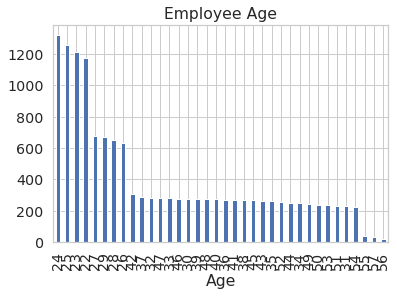

In [30]:
plt.xlabel("Age")
plt.title("Employee Age")
emp_det_data['age'].value_counts().plot.bar()


In [31]:
emp_det_data['gender'].nunique()

2

In [32]:
emp_det_data['marital_status'].nunique()

2

###### Employee_Details_Data table
- Table contains 14245 Rows/Records for Employees
- All the records are Unique
- The data in 'age' column seems to contain logical records, no outliers are found
- The data in 'gender' column contains only 2 type of records
- The data in 'marital_status' column contains only 2 type of records

#### Merging the Data

In [33]:
merged_df = pd.merge(dpt_data, emp_data, how ='right', left_on='dept_id', right_on='department').drop(['dept_id', 'department'], 1)

In [34]:
merged_df = pd.merge(merged_df, emp_det_data, how ='left', left_on='employee_id', right_on='employee_id')

In [35]:
merged_df["filed_complaint"].fillna(0, inplace = True)
merged_df["last_evaluation"].fillna(merged_df['last_evaluation'].mean(), inplace = True)
merged_df["recently_promoted"].fillna(0, inplace = True)
merged_df["satisfaction"].fillna(merged_df['satisfaction'].mean(), inplace = True)
merged_df["tenure"].fillna(1, inplace = True)
merged_df = merged_df.drop(['dept_head'], axis=1)

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_name          13410 non-null  object 
 1   avg_monthly_hrs    14116 non-null  float64
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


###### Merged Data Analysis
- Department and Employee data is merged on the basis of 'dept_id' and 'department' columns
- Both the columns 'dept_id' and 'department' are removed as well
- The merged data of above 2 tables is then merged with Employee Details on the basis of 'employee_id'
- 'dept_head' column is removed, as it will not be of much use
- Object type variables needs to converted to Numerical

In [37]:
# Optional, can be removed. Dropping the rows with null values
#merged_df.dropna(subset=['dept_name'], inplace=True)
#merged_df['satisfaction'].value_counts()
#merged_df['last_evaluation'].value_counts()

- department vs Avg Monthly hours
- department vs filed complaints
- department vs last evaluation
- department vs number of projects



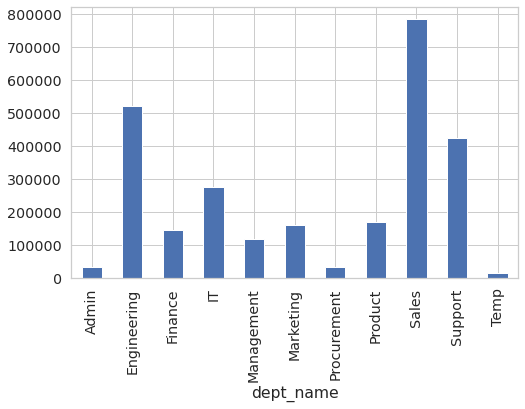

In [38]:
merged_df.groupby(["dept_name"]).sum()["avg_monthly_hrs"].plot.bar(stacked = True, figsize =(8,5))

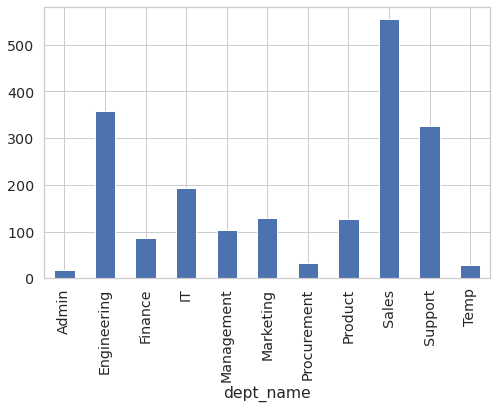

In [39]:
merged_df.groupby(["dept_name"]).sum()["filed_complaint"].plot.bar(stacked = True, figsize =(8,5))

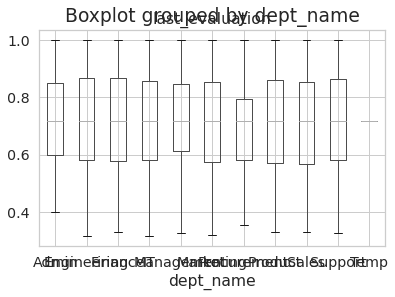

In [40]:
merged_df.boxplot(column=['last_evaluation'], by='dept_name')
plt.rcParams["figure.figsize"] = (20,8)
plt.show()


In [41]:
#merged_df.groupby(["dept_name"]).count()["status"].plot.bar(stacked = True, figsize =(8,5))
#df = pd.DataFrame({'status': merged_df.groupby(["dept_name", "status"]).count()[0],
                   #'salary': merged_df.groupby(["dept_name", "salary"]).count()[0]}, index= merged_df["dept_name"].unique())
#df.plot.barh(rot=0)
#merged_df
merged_df.groupby(["dept_name", "status", "salary"]).count()#["satisfaction"]#.plot.bar(stacked = True, figsize =(8,5))
#merged_df.groupby(["dept_name", "status", "salary"]).count().plot.bar(stacked = True, figsize =(8,5))
#merged_df.groupby(["dept_name"]).count()["status"].plot.bar(stacked = True, figsize =(8,5))

avg_monthly_hrs  ...  marital_status
dept_name status   salary                   ...                
Admin     Employed high                 11  ...              11
                   low                  64  ...              64
                   medium               65  ...              65
          Left     high                  1  ...               1
                   low                  19  ...              19
...                                    ...  ...             ...
Temp      Employed low                  56  ...              56
                   medium               66  ...              66
          Left     high                  1  ...               1
                   low                   8  ...               8
                   medium               11  ...              11

[64 rows x 11 columns]

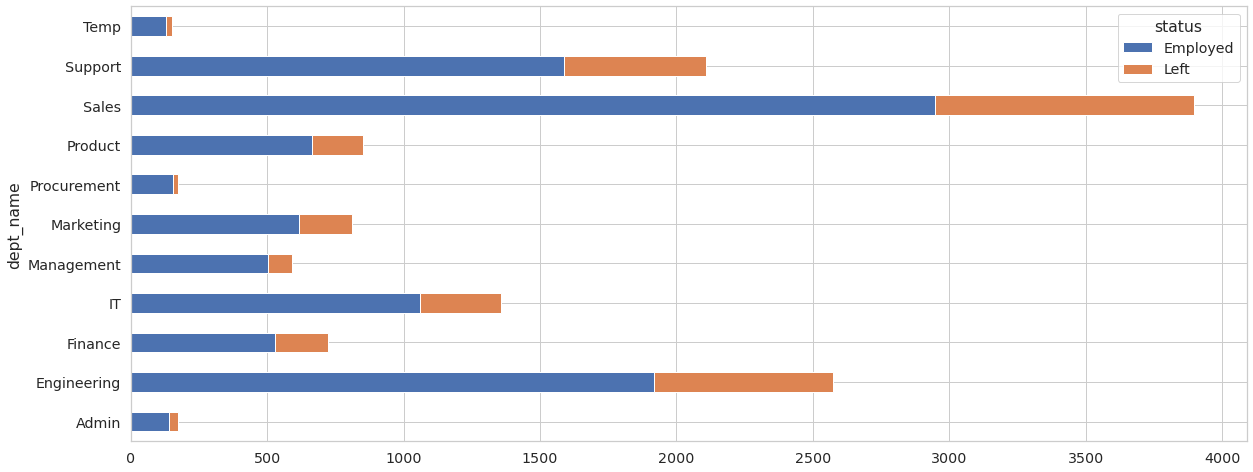

In [42]:
#YStatus = merged_df.groupby(["dept_name", "status"]).count()["employee_id"]
#ZSalary = merged_df.groupby(["dept_name", "salary"]).count()["employee_id"]
#YStatus
merged_df.groupby(["dept_name", "status"]).size().unstack().plot(kind='barh', stacked=True)

#merged_df.groupby(["dept_name", "salary", "status"]).size().unstack().plot(kind='bar', stacked=True)


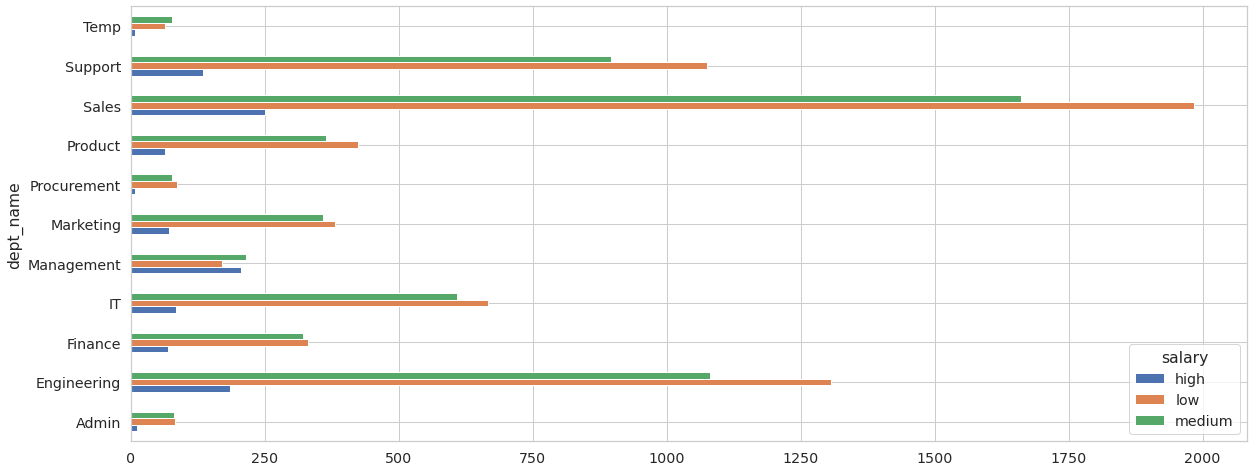

In [43]:
merged_df.groupby(["dept_name", "salary"]).size().unstack().plot(kind='barh', stacked=False)

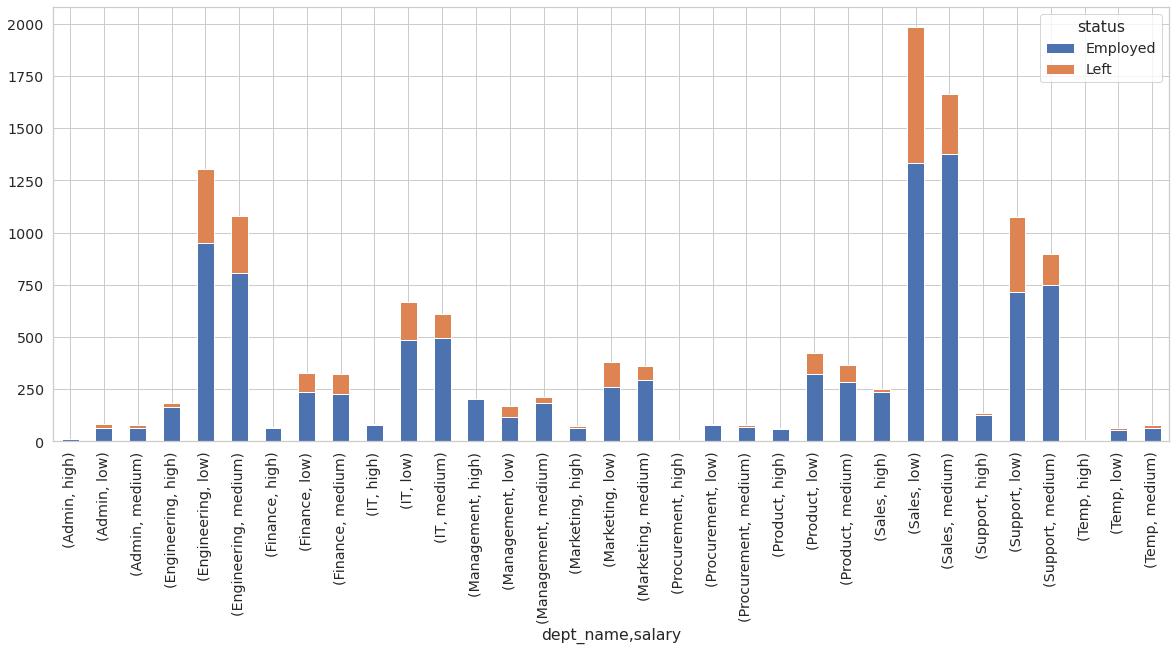

In [44]:
merged_df.groupby(["dept_name", "salary", "status"]).size().unstack().plot(kind='bar', stacked=True)
